In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA


In [2]:
# Load Features
negative_features = np.load("data/negative_features.npy")
positive_features = np.load("data/positive_features.npy")

# Combine features and apply PCA
X_combined = np.vstack((negative_features, positive_features)).reshape(len(negative_features) + len(positive_features), -1)
X_combined = X_combined.reshape(X_combined.shape[0], -1)  # Flattening

# Apply PCA
pca = IncrementalPCA(batch_size=512)
X_pca = pca.fit_transform(X_combined)

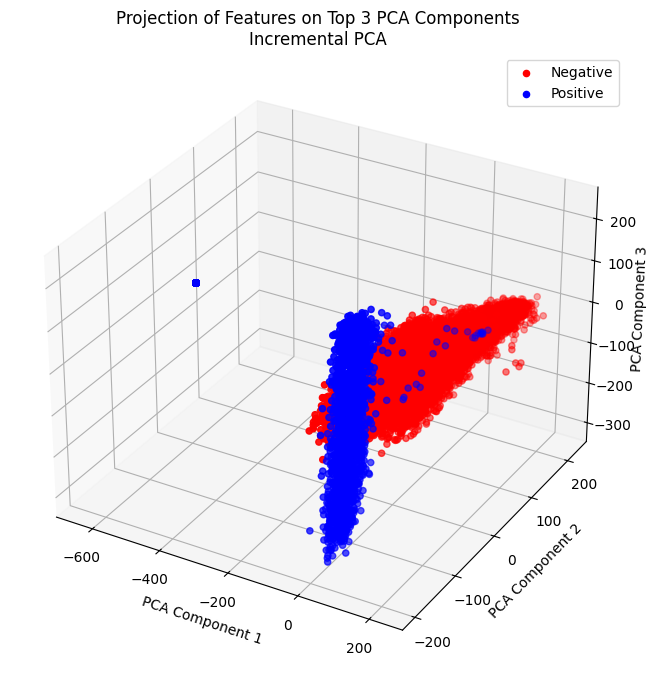

In [5]:
# Visualize top 3 PCA components
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:len(negative_features), 0], X_pca[:len(negative_features), 1], X_pca[:len(negative_features), 2], color='red', label='Negative')
ax.scatter(X_pca[len(negative_features):, 0], X_pca[len(negative_features):, 1], X_pca[len(negative_features):, 2], color='blue', label='Positive')
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3\n")
ax.set_title("Projection of Features on Top 3 PCA Components\nIncremental PCA")
ax.legend()
plt.show()